#**Introduction**
A match prediction on a cricket game adds and creates interest for a fan watching a cricket match. Apart from having fun while watching a game, it helps people to come up with their Dream XI team. By keeping in mind the factors relating to the prediction the model predicts the performance of an individual player.
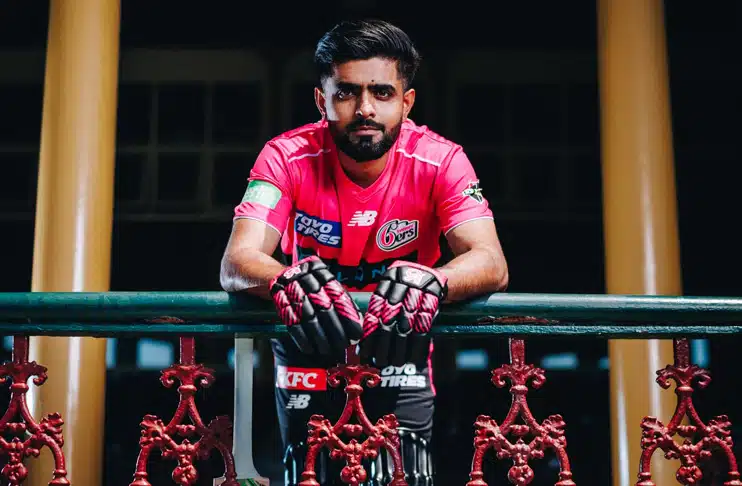


# **Cricket Player Performance Prediction**
The Cricket Player Performance Prediction model forecasts the number of runs a batsman is likely to score based on the number of balls faced and the overs played. It leverages a dataset containing players’ historical performance records. By analyzing a player’s past performances along with other relevant attributes, the model generates an estimated score.

This approach uses Multiple Regression (a Supervised Learning method). In this method, the dataset is split into training and testing sets, and the model is trained on labeled data. Unlike unsupervised learning, supervised learning relies on labels to guide the training process. Variables are categorized into dependent variables (the target we aim to predict) and independent variables (the features used for prediction). Various regression models can be applied, and the one with the highest accuracy is selected to generate precise predictions.

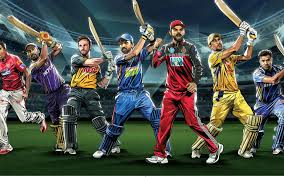

#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
br = pd.read_csv('/content/Ipl PLayer stats.csv')

In [3]:
print(br)

      Unnamed: 0             Player  Runs  BF      SR  4s  6s Against  \
0              0    Virender Sehwag    30   6  500.00   3   3     DEC   
1              1  Sanath Jayasuriya    26   5  520.00   2   3     CSK   
2              2        MF Maharoof    26   5  520.00   0   4      RR   
3              3       Rohit Sharma   110   6  433.33   3   2      DC   
4              4       Shane Watson    26   6  433.33   5   1     RCB   
...          ...                ...   ...  ..     ...  ..  ..     ...   
2095        2095    Ruturaj Gaikwad    13   6  216.66   1   1     KKR   
2096        2096       Ishan Kishan    13   4  325.00   1   1     RCB   
2097        2097      Mohammad Nabi    13   3  433.33   0   2      RR   
2098        2098     Venkatesh Iyer    13   5  260.00   0   2      RR   
2099        2099      Ambati Rayudu    13   5  260.00   1   1      DC   

                                   Venue Match Date  
0     Rajiv Gandhi Intl. Cricket Stadium  22-Apr-08  
1              

In [4]:
br.isnull().sum()


,0
Unnamed: 0,0
Player,0
Runs,0
BF,0
SR,0
4s,0
6s,0
Against,0
Venue,0
Match Date,0


#Data Analysis

In [5]:
br

,Unnamed: 0,Player,Runs,BF,SR,4s,6s,Against,Venue,Match Date
0,0,Virender Sehwag,30,6,500.00,3,3,DEC,Rajiv Gandhi Intl. Cricket Stadium,22-Apr-08
1,1,Sanath Jayasuriya,26,5,520.00,2,3,CSK,Wankhede Stadium,14-May-08
2,2,MF Maharoof,26,5,520.00,0,4,RR,Sawai Mansingh Stadium,11-May-08
3,3,Rohit Sharma,110,6,433.33,3,2,DC,Rajiv Gandhi Intl. Cricket Stadium,22-Apr-08
4,4,Shane Watson,26,6,433.33,5,1,RCB,M. Chinnaswamy Stadium,26-Apr-08
...,...,...,...,...,...,...,...,...,...,...
2095,2095,Ruturaj Gaikwad,13,6,216.66,1,1,KKR,Wankhede Stadium,21-Apr-21
2096,2096,Ishan Kishan,13,4,325.00,1,1,RCB,Chidambaram,09-Apr-21
2097,2097,Mohammad Nabi,13,3,433.33,0,2,RR,Arun Jaitley Stadium,02-May-21
2098,2098,Venkatesh Iyer,13,5,260.00,0,2,RR,Sharjah Cricket Stadium,07-Oct-21


## Calculate Total Runs



In [6]:
total_runs_per_player = br.groupby('Player')['Runs'].sum().reset_index()
print(total_runs_per_player.head(18))

             Player  Runs
0    AB de Villiers  1010
1       Aaron Finch   275
2       Abdul Samad    43
3    Abhishek Nayar    74
4     Abhishek Raut    32
5   Abhishek Sharma    20
6    Adam Gilchrist   537
7        Adam Voges    14
8       Aditya Tare    15
9    Aiden Blizzard    20
10   Ajinkya Rahane   160
11    Akshath Reddy    13
12     Albie Morkel   168
13       Alex Hales    19
14    Ambati Rayudu   411
15      Amit Mishra    42
16    Andre Russell   589
17  Andrew Flintoff    13


## Identify Top Player

Identifing the player who has scored the maximum total runs.


In [7]:
top_player = total_runs_per_player.loc[total_runs_per_player['Runs'].idxmax()]
print(top_player)

Player    Chris Gayle
Runs             1624
Name: 42, dtype: object


#Identify Top 10 Players with Most Runs

In [8]:
top_10_players = total_runs_per_player.sort_values(by='Runs', ascending=False).head(10)
print(top_10_players)

               Player  Runs
42        Chris Gayle  1624
0      AB de Villiers  1010
114          MS Dhoni   955
176      Rohit Sharma   916
104    Kieron Pollard   906
195      Shane Watson   818
55       David Warner   749
234       Virat Kohli   744
216      Suresh Raina   669
37   Brendon McCullum   622


#Visualization using graph

/tmp/ipython-input-151967732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x='Player', y='Runs', data=top_10_players, palette='tab10')


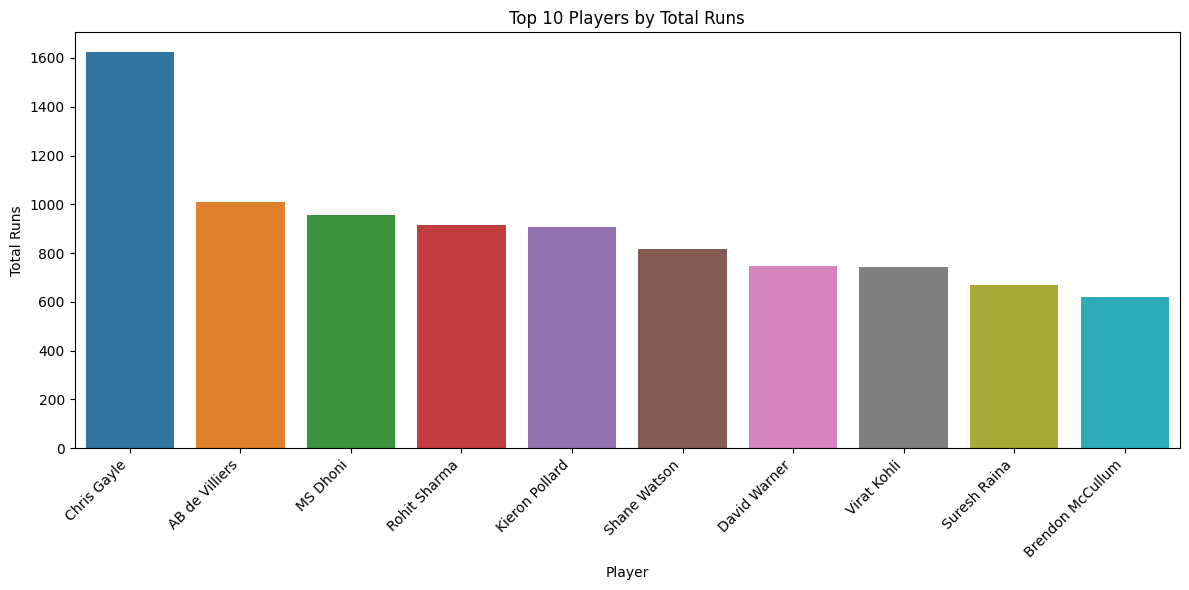

Bar plot showing the total runs of the top 10 players by total runs.


In [9]:
plt.figure(figsize=(12, 6))
sea.barplot(x='Player', y='Runs', data=top_10_players, palette='tab10')
plt.title('Top 10 Players by Total Runs')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot showing the total runs of the top 10 players by total runs.")

## Calculate Total 6s per Player



In [10]:
total_6s_per_player = br.groupby('Player')['6s'].sum().reset_index()
print(total_6s_per_player.head())

           Player   6s
0  AB de Villiers  103
1     Aaron Finch   22
2     Abdul Samad    5
3  Abhishek Nayar    6
4   Abhishek Raut    3


## Identify Player with Most 6s


In [11]:
top_6s_player = total_6s_per_player.loc[total_6s_per_player['6s'].idxmax()]
print(top_6s_player)

Player    Chris Gayle
6s                159
Name: 42, dtype: object


## Visualize Top Players by 6s




/tmp/ipython-input-3926739694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x='Player', y='6s', data=top_10_6s_players, palette='rocket')


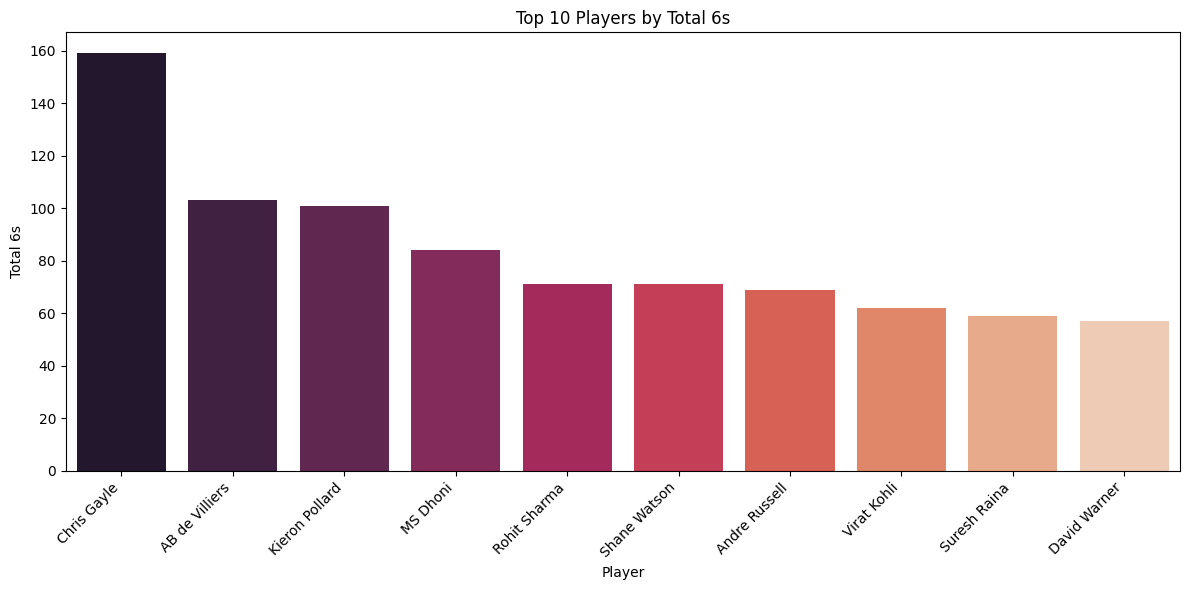

Bar plot showing the total 6s hit by the top 10 players.


In [12]:
top_10_6s_players = total_6s_per_player.sort_values(by='6s', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sea.barplot(x='Player', y='6s', data=top_10_6s_players, palette='rocket')
plt.title('Top 10 Players by Total 6s')
plt.xlabel('Player')
plt.ylabel('Total 6s')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot showing the total 6s hit by the top 10 players.")

## Calculate Total 4s per Player




In [13]:
total_4s_per_player = br.groupby('Player')['4s'].sum().reset_index()
print(total_4s_per_player)

              Player  4s
0     AB de Villiers  71
1        Aaron Finch  28
2        Abdul Samad   2
3     Abhishek Nayar   6
4      Abhishek Raut   2
..               ...  ..
238     Yogesh Nagar   1
239  Yogesh Takawale   3
240     Yusuf Pathan  46
241     Yuvraj Singh  25
242      Zaheer Khan   2

[243 rows x 2 columns]


In [14]:
top_4s_player = total_4s_per_player.loc[total_4s_per_player['4s'].idxmax()]
print(top_4s_player)

Player    Chris Gayle
4s                113
Name: 42, dtype: object


#Graph

Players with most four 4s (Top 10)

/tmp/ipython-input-1361588277.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x='Player', y='4s', data=top_10_4s_players, palette='flare')


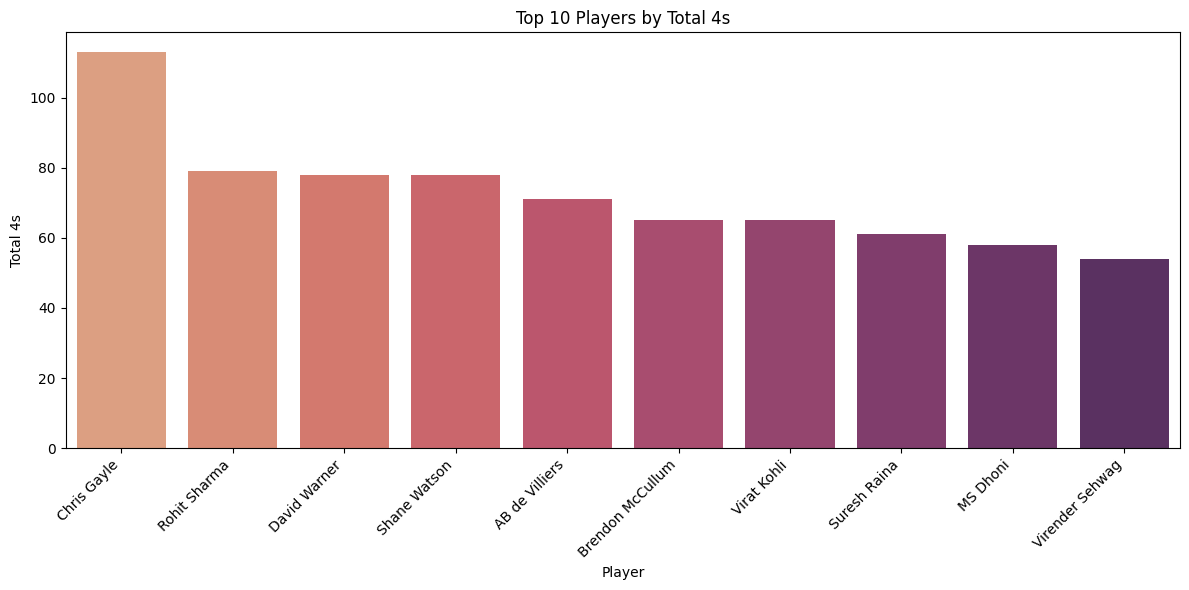

Bar plot showing the total 4s hit by the top 10 players.


In [15]:
top_10_4s_players = total_4s_per_player.sort_values(by='4s', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sea.barplot(x='Player', y='4s', data=top_10_4s_players, palette='flare')
plt.title('Top 10 Players by Total 4s')
plt.xlabel('Player')
plt.ylabel('Total 4s')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot showing the total 4s hit by the top 10 players.")

#Teams Names

In [16]:
c =br['Against'].unique()
print(c)

['DEC' 'CSK' 'RR' 'DC' 'RCB' 'PBKS' 'MI' 'KKR' 'KTK' 'PWI' 'SRH' 'GL'
 'RPS']


#Venus Names

In [17]:
a =br['Venue'].unique()
print(a)

['Rajiv Gandhi Intl. Cricket Stadium' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'M. Chinnaswamy Stadium' 'IS Bindra Stadium'
 'Arun Jaitley Stadium' 'DY Patil Stadium' 'Chidambaram' 'Eden Gardens'
 'New Wanderers Stadium' 'Supersport Park' 'Newlands' 'Kingsmead'
 'De Beers Diamond Oval' "St George's Park" 'OUTsurance Oval'
 'Buffalo Park' 'Narendra Modi Stadium' 'Brabourne Stadium'
 'Barabati Stadium' 'HPCA Stadium' 'Vidarbha Cricket Association Stadium'
 'Jawaharlal Nehru Stadium' 'Holkar Cricket Stadium'
 "Maharashtra Cricket Association's International Stadium"
 'ACA-VDCA Stadium'
 'Shaheed Veer Narayan Singh International Cricket Stadium' 'JSCA Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Stadium'
 'Zayed Cricket Stadium' 'Saurashtra Cricket Association Stadium'
 'Green Park']


#Player who scored **100**:🔥

In [18]:
v = br.loc[br['Runs'] > 100]

arrnp = v['Player'].values
runs = v['Runs'].tolist()

players = v['Player'].tolist()


print("Players with more than 100 runs:")
print(players , "\n")

print("Runs scored by these players:")
print(runs , "\n")


Players with more than 100 runs:
['Rohit Sharma', 'MS Dhoni', 'Chris Gayle'] 

Runs scored by these players:
[110, 101, 167] 



##Player with Most Balls Faced

In [19]:
Ball_Faced = br.groupby('Player')['BF'].sum().reset_index()

top_bf_player = Ball_Faced .loc[Ball_Faced ['BF'].idxmax()]

print("Player who faced the most balls:")
print(top_bf_player)

Player who faced the most balls:
Player    Chris Gayle
BF                417
Name: 42, dtype: object


## Top 10 Players Faced Balls

In [20]:
top_10_bf_players = Ball_Faced.sort_values(by='BF', ascending=False).head(10)
print(top_10_bf_players)

               Player   BF
42        Chris Gayle  417
0      AB de Villiers  293
114          MS Dhoni  266
104    Kieron Pollard  258
176      Rohit Sharma  254
195      Shane Watson  251
55       David Warner  244
234       Virat Kohli  233
216      Suresh Raina  203
37   Brendon McCullum  201


# Graph for Ball Faced (***using seaborn as sea***)

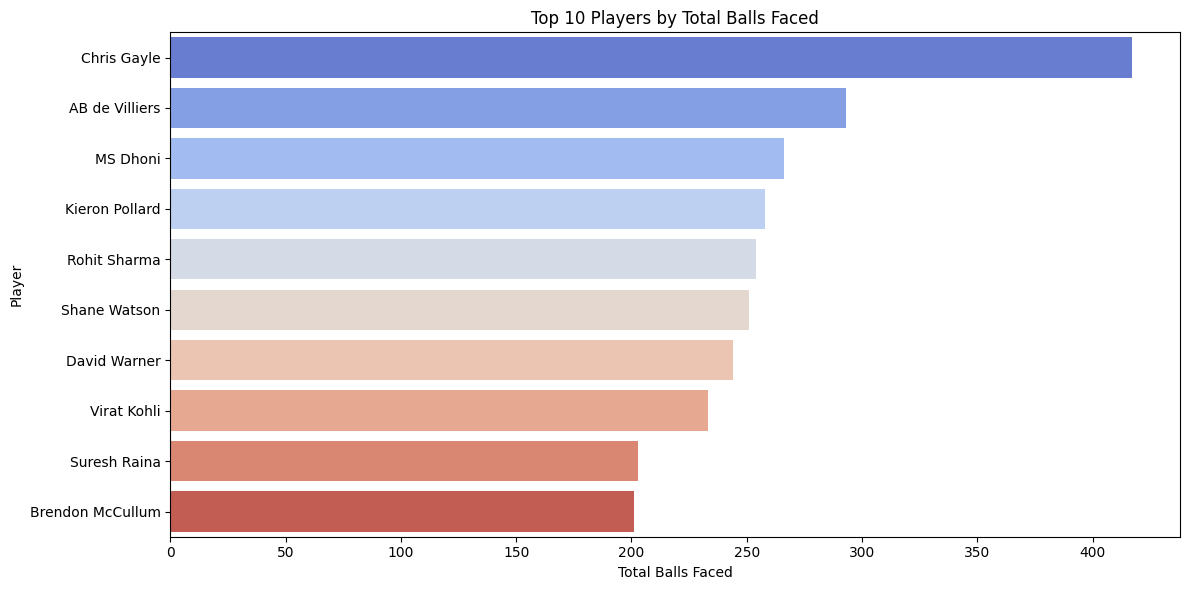

Bar plot showing the total balls faced by the top 10 players.


In [21]:
plt.figure(figsize=(12, 6))
sea.barplot(x='BF', y='Player', data=top_10_bf_players, palette='coolwarm', hue='Player', legend=False)
plt.title('Top 10 Players by Total Balls Faced')
plt.xlabel('Total Balls Faced')
plt.ylabel('Player')
plt.tight_layout()
plt.show()
print("Bar plot showing the total balls faced by the top 10 players.")

##Player with the Highest Overall Strike Rate

In [22]:
# 1. Merge total runs and balls faced to create player_stats
player_stats = pd.merge(total_runs_per_player, Ball_Faced, on='Player')

# 2. Calculate the 'SR' (Strike Rate) column
player_stats['SR'] = player_stats.apply(lambda row: (row['Runs'] / row['BF']) * 100 if row['BF'] > 0 else 0, axis=1)

# 3. Identify the player with the highest overall Strike Rate
player_with_most_sr = player_stats.loc[player_stats['SR'].idxmax()]

# 4. Print only the player's name and their strike rate
print("Player with the highest overall Strike Rate:")
print(player_with_most_sr[['Player', 'SR']])

Player with the highest overall Strike Rate:
Player    Balachandra Akhil
SR                    475.0
Name: 30, dtype: object


## Top 10 Players by Overall Strike Rate

In [23]:
player_stats = pd.merge(total_runs_per_player, Ball_Faced, on='Player')
player_stats['SR'] = player_stats.apply(lambda row: (row['Runs'] / row['BF']) * 100 if row['BF'] > 0 else 0, axis=1)

# Sort and get the top 10 players by Strike Rate
top_10_sr_players = player_stats.sort_values(by='SR', ascending=False).head(10)

print("Top 10 Players by Overall Strike Rate:")
print(top_10_sr_players)

Top 10 Players by Overall Strike Rate:
                Player  Runs  BF          SR
30   Balachandra Akhil    19   4  475.000000
198      Shaun Pollock    19   4  475.000000
48        D'Arcy Short    18   4  450.000000
166        Rashid Khan    18   4  450.000000
136      Mohammad Nabi    13   3  433.333333
27       Ashok Menaria    13   3  433.333333
113        MF Maharoof    43  10  430.000000
224        Travis Head    17   4  425.000000
77       Harshal Patel    34   8  425.000000
83          Jacob Oram    17   4  425.000000


## Player with the Highest Strike Rate (by seaborn)

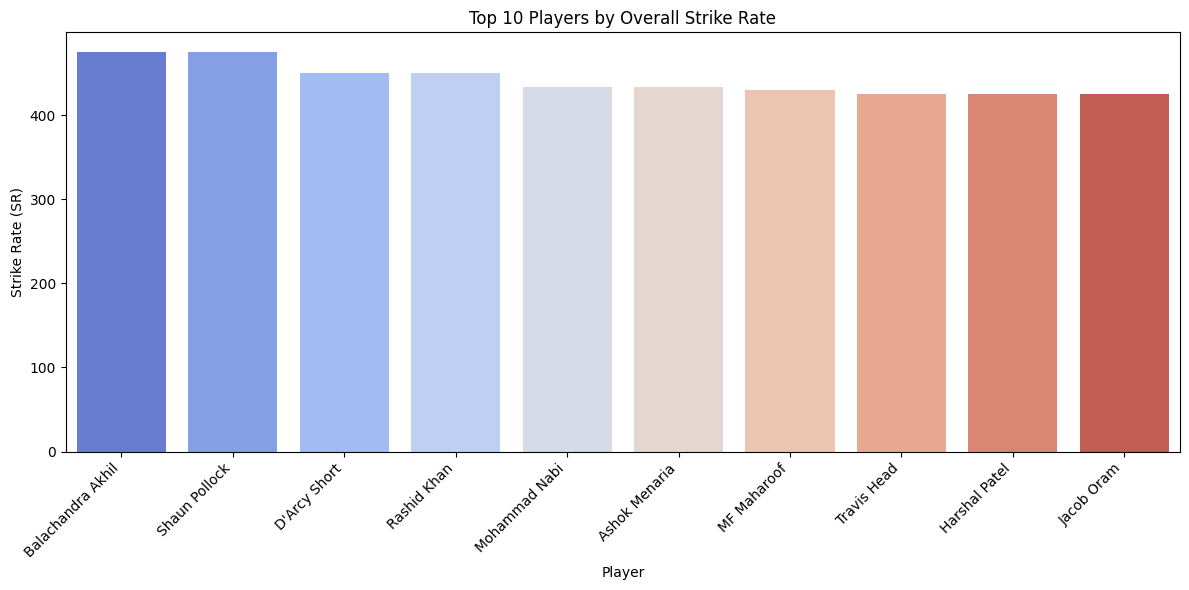

Bar plot showing the overall strike rate of the top 10 players.


In [24]:
# Visualize Top 10 Players by Strike Rate
plt.figure(figsize=(12, 6))
sea.barplot(x='Player', y='SR', data=top_10_sr_players, palette='coolwarm', hue='Player', legend=False)
plt.title('Top 10 Players by Overall Strike Rate')
plt.xlabel('Player')
plt.ylabel('Strike Rate (SR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot showing the overall strike rate of the top 10 players.")

#Any player Data

In [25]:
selected_players = ['Chris Gayle', 'Rohit Sharma']
demo = br[br['Player'].isin(selected_players)][['Player', 'Against', 'Runs', 'BF', 'SR']]
display(demo.head(20))

,Player,Against,Runs,BF,SR
3,Rohit Sharma,DC,110,6,433.33
13,Rohit Sharma,PBKS,21,6,350.00
28,Rohit Sharma,DC,19,5,380.00
58,Rohit Sharma,PBKS,16,5,320.00
153,Rohit Sharma,KKR,22,6,366.66
163,Rohit Sharma,RCB,19,5,380.00
180,Rohit Sharma,PBKS,17,5,340.00
196,Rohit Sharma,KKR,15,5,300.00
200,Chris Gayle,PBKS,167,5,300.00
242,Chris Gayle,RR,13,4,325.00


#Splitting Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split
X= demo.drop(['Runs'],axis=1)
Y = demo['Runs']
train_X, test_X, train_Y,test_Y = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=42)

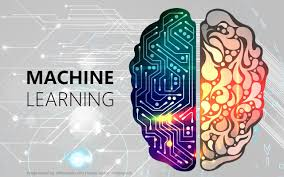








#Importing Required Libraries for ***Machine Learning:🔍***

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(demo.drop(['Runs'], axis=1), columns=['Player', 'Against'])
Y = demo['Runs']

# Split the encoded data into training and testing sets
train_X_encoded, test_X_encoded, train_Y, test_Y = train_test_split(X_encoded, Y, test_size=0.20, shuffle=True)

#Training and Evaluating Decision Tree Regressor

In [29]:
# Training and Evaluating Decision Tree Regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(train_X_encoded, train_Y)

tree_pred = tree.predict(test_X_encoded)
tree_r2 = r2_score(test_Y, tree_pred)

print("Decision Tree R²:", tree_r2)

Decision Tree R²: -19.028449293247995


#Training and Evaluating Decision Linear Regressor

In [30]:
# Training and Evaluating Linear Regressor
li = LinearRegression()
li.fit(train_X_encoded, train_Y)

li_pred = li.predict(test_X_encoded)
li_r2 = r2_score(test_Y, li_pred)

print("Linear Regression R²:", li_r2)

Linear Regression R²: -0.15611623310066558


#Storing the values

In [31]:
comp = {
    "Decision Tree": tree_r2,
    "Linear Regression": li_r2
}

print(comp)


{'Decision Tree': -19.028449293247995, 'Linear Regression': -0.15611623310066558}


#Comparison Between **Tree** And **Linear** Regression

Using the graph

<BarContainer object of 2 artists>

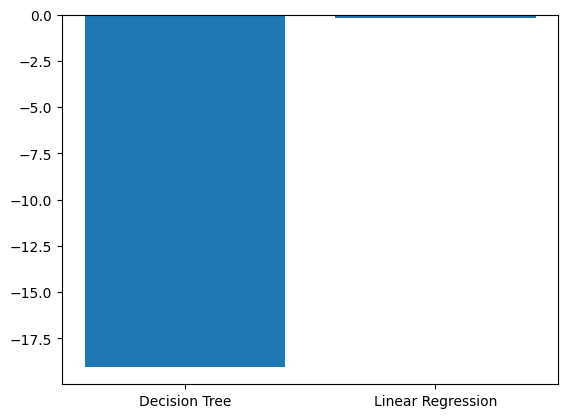

In [32]:
keys = list(comp.keys())
val = list(comp.values())

plt.bar(keys,val)


#Linear Regression

As the above graph shows that linear regression is positive and Decision Tree is negative so according to the graph the accuracy or best for our model is Linear regression.

In [34]:


# Prepare numeric-only data
X_numeric = demo[['BF' , 'SR']]
Y = demo['Runs']

#Train the model
li = LinearRegression()
li.fit(X_numeric, Y)

#Predict
player = input('Enter player name: ')
against = input('Enter Against team: ')
bf = float(input('Enter balls faced: '))
sr = float(input('Enter strike rate: '))

preds = li.predict([[bf, sr]])
preds = int(preds[0])

print(f"{player}'s predicted runs against {against}: {preds}")





Enter player name: dhoni
Enter Against team: rcb
Enter balls faced: 10
Enter strike rate: 100
dhoni's predicted runs against rcb: 28


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


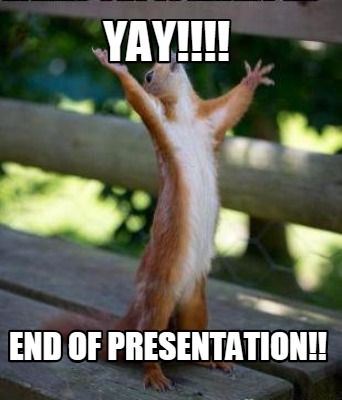